In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aarushverma","key":"a556b53644acf230d4623a725d843ac2"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer

 82% 5.00M/6.09M [00:00<00:00, 36.4MB/s]
100% 6.09M/6.09M [00:00<00:00, 38.9MB/s]
 55% 5.00M/9.16M [00:00<00:00, 31.0MB/s]
100% 9.16M/9.16M [00:00<00:00, 44.8MB/s]
  0% 0.00/235k [00:00<?, ?B/s]
100% 235k/235k [00:00<00:00, 71.1MB/s]


In [ ]:
!mkdir train
!unzip train.csv.zip -d train

Archive:  train.csv.zip
  inflating: train/train.csv         


In [ ]:
!mkdir test
!unzip test.csv.zip -d test

Archive:  test.csv.zip
  inflating: test/test.csv           


In [ ]:
!mkdir images
!mkdir test_images

mkdir: cannot create directory ‘test_images’: File exists


In [ ]:
import csv                   #For train images
from PIL import Image
import numpy as np
import pandas as pd
import string
import os
 
csv_File_Path = '/content/train/train.csv'# Downloded csv file path
 
count = 1
last_digit_Name =  None
 
image_Folder_Path = '/content/images'# Target folder path
 
Alphabet_Mapping_List = list(['0','1','2','3','4','5','6','7','8','9'])
 
for alphabet in Alphabet_Mapping_List:
    path = image_Folder_Path + '/' + alphabet
    if not os.path.exists(path):
        os.makedirs(path)
df = pd.read_csv(csv_File_Path)
for i in range(len(df)):
    digit_Name = df.loc[i][0]
    image_array = np.array(df.loc[i][1:])
    image_array = image_array.reshape(28, 28)
    new_image = Image.fromarray(image_array.astype('uint8'))
    
    image_Path = image_Folder_Path + '/' + str(digit_Name) + '/' + str(digit_Name) + '-' + str(count) + '.png'
    new_image.save(image_Path)
    count = count + 1

    if count % 1000 == 0:
        print ("Images processed: " + str(count))

Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11000
Images processed: 12000
Images processed: 13000
Images processed: 14000
Images processed: 15000
Images processed: 16000
Images processed: 17000
Images processed: 18000
Images processed: 19000
Images processed: 20000
Images processed: 21000
Images processed: 22000
Images processed: 23000
Images processed: 24000
Images processed: 25000
Images processed: 26000
Images processed: 27000
Images processed: 28000
Images processed: 29000
Images processed: 30000
Images processed: 31000
Images processed: 32000
Images processed: 33000
Images processed: 34000
Images processed: 35000
Images processed: 36000
Images processed: 37000
Images processed: 38000
Images processed: 39000
Images processed: 40000
Images processed: 41000
Images processed: 42000


In [ ]:
import csv                   #For Test Images
from PIL import Image
import numpy as np
import pandas as pd
import string
import os
 
csv_File_Path = '/content/test/test.csv'# Downloded csv file path
 
count = 1
last_digit_Name =  None
 
image_Folder_Path = '/content/test_images'# Target folder path
os.makedirs(image_Folder_Path + '/test_set')
df = pd.read_csv(csv_File_Path)
for i in range(len(df)):
    image_array = np.array(df.loc[i])
    image_array = image_array.reshape(28, 28)
    new_image = Image.fromarray(image_array.astype('uint8'))
    
    image_Path = image_Folder_Path + '/test_set/' + str(count) + '.png'
    new_image.save(image_Path)
    count = count + 1

    if count % 1000 == 0:
        print ("Images processed: " + str(count))

Images processed: 1000
Images processed: 2000
Images processed: 3000
Images processed: 4000
Images processed: 5000
Images processed: 6000
Images processed: 7000
Images processed: 8000
Images processed: 9000
Images processed: 10000
Images processed: 11000
Images processed: 12000
Images processed: 13000
Images processed: 14000
Images processed: 15000
Images processed: 16000
Images processed: 17000
Images processed: 18000
Images processed: 19000
Images processed: 20000
Images processed: 21000
Images processed: 22000
Images processed: 23000
Images processed: 24000
Images processed: 25000
Images processed: 26000
Images processed: 27000
Images processed: 28000


In [ ]:
batch_size = 32
image_height = 28
image_width = 28

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/images', 
    labels='inferred',
    label_mode='categorical',
    image_size = (image_height, image_width),
    batch_size = batch_size)

Found 42000 files belonging to 10 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/test_images', 
    labels='inferred',
    shuffle = False,
    label_mode='categorical',
    image_size = (image_height, image_width),
    batch_size = 1)

Found 28000 files belonging to 1 classes.


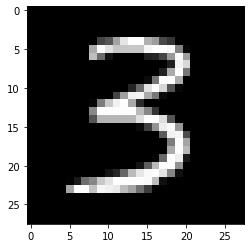

In [ ]:
for image,label in val_ds.take(2):
    plt.imshow(image[0]/255)

In [ ]:
from tensorflow.keras import layers
num_classes = 10

model = tf.keras.Sequential([
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(32,3, activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(50, activation='relu'),
    layers.Dense(num_classes)
])

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = tf.losses.CategoricalCrossentropy(from_logits = True),
    metrics = ['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    epochs = 10)

Epoch 1/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.1042 - accuracy: 0.9681
Epoch 2/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0459 - accuracy: 0.9857
Epoch 3/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0325 - accuracy: 0.9899
Epoch 4/10
1313/1313 [==============================] - 47s 36ms/step - loss: 0.0234 - accuracy: 0.9925
Epoch 5/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 6/10
1313/1313 [==============================] - 46s 35ms/step - loss: 0.0141 - accuracy: 0.9954
Epoch 7/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0113 - accuracy: 0.9964
Epoch 8/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0092 - accuracy: 0.9967
Epoch 9/10
1313/1313 [==============================] - 47s 35ms/step - loss: 0.0086 - accuracy: 0.9971
Epoch 10/10
1313/1313 [==============================] - 47s 35m

6


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


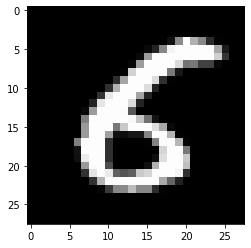

In [ ]:
for image, labels in train_ds.take(1):
  i = 5
  pred = model.predict_classes(image)
  plt.imshow(image[i]/255)
  print(pred[i])

**For Submission**

In [ ]:
import csv                       # 0.98725 accuracy on MNIST data
row_list = [['ImageId', 'Label']]
new_row_list = [['ImageId', 'Label']]
cnt = 0
dirFiles = os.listdir('/content/test_images/test_set')
dirFiles.sort() 
for image, labels in val_ds:
  pred = model.predict_classes(image)
  temp = [dirFiles[cnt][:-4], pred[0]]
  row_list.append(temp)
  cnt = cnt+1
for i in range(1,len(row_list)):
  for j in row_list:
    if(str(i) == j[0]):
      ele = [str(i),j[1]]
      new_row_list.append(ele)
      break;
with open('submission.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(new_row_list)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
